Annotaion experiment based on the npy files that created

In [1]:
# Import Libraries
import os
import pandas as pd

In [2]:
BASE_DIR = '/home/h6x/git_projects/ornl-svi-data-processing/processed_data/adjacency_pers_images_npy_county/experimet_10'
DATA_DIR = f"{BASE_DIR}/images"

In [3]:
ANNOTATION_PATH = '/home/h6x/git_projects/ornl-svi-data-processing/processed_data/annotations/annotations_2018_90_2_classes.csv'

In [4]:
def get_npy_filenames(directory):
    """
    Get all .npy file names in the specified directory without the .npy extension.
    
    Args:
    directory (str): The path to the directory containing .npy files.
    
    Returns:
    list: A list of file names without the .npy extension.
    """
    file_names = []
    for file in os.listdir(directory):
        if file.endswith('.png'):
            file_names.append(os.path.splitext(file)[0])
    return file_names

In [5]:
fips_codes = get_npy_filenames(DATA_DIR)

In [6]:
len(fips_codes)

2544

In [7]:
# full annotation df
annotation_df = pd.read_csv(ANNOTATION_PATH,dtype={'STCNTY':str})

In [8]:
# Filter the annotation dataframe to only include the FIPS codes that have been processed
annotation_df_filtered = annotation_df[annotation_df['STCNTY'].isin(fips_codes)]

In [9]:
annotation_df_filtered.shape

(2539, 4)

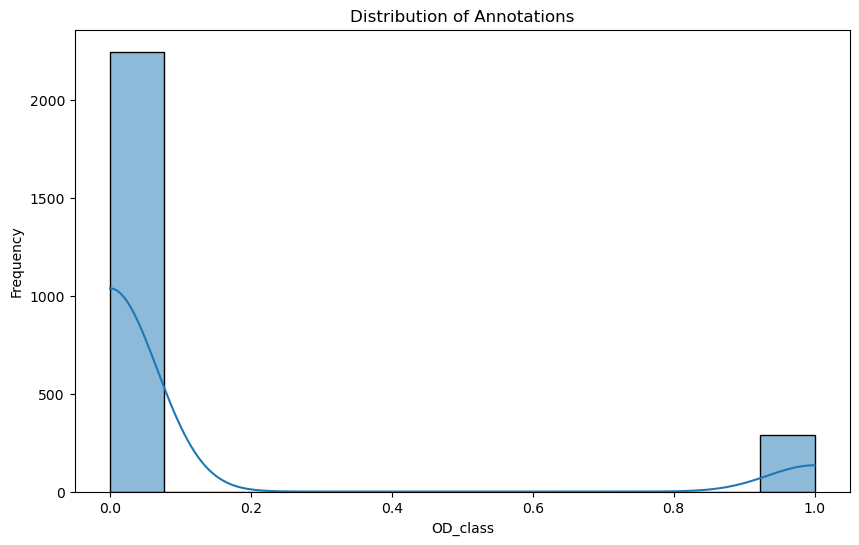

In [10]:
# plot the distribution of the annotations "pecen_US" column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(annotation_df_filtered['OD_class'], kde=True)
plt.title('Distribution of Annotations')
plt.xlabel('OD_class')
plt.ylabel('Frequency')
plt.show()

In [11]:
# # get random 2000 samples from the annotation_df_filtered class 0 and all the samples from class 1

class_0 = annotation_df_filtered[annotation_df_filtered['OD_class'] == 0].sample(n=300, random_state=42)
class_1 = annotation_df_filtered[annotation_df_filtered['OD_class'] == 1]

# Combine the two classes
combined_df = pd.concat([class_0, class_1])

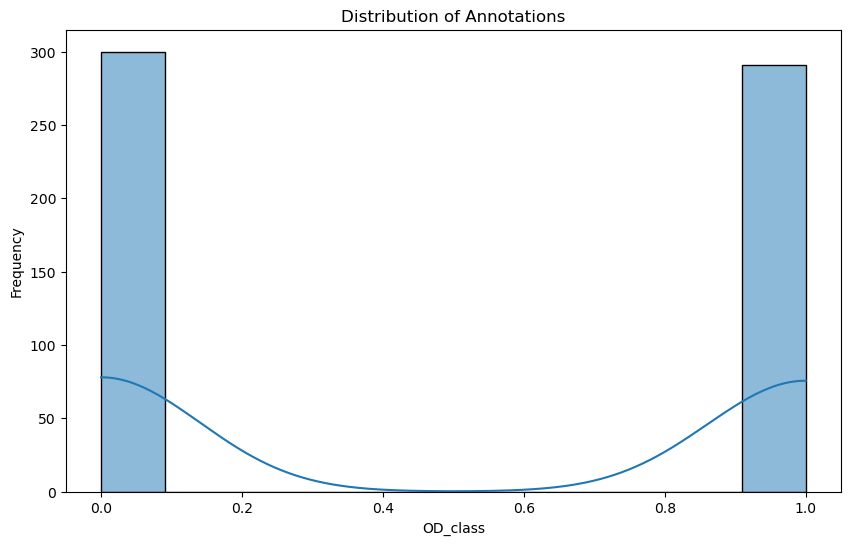

In [12]:
# plot the distribution of the annotations "pecen_US" column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(combined_df['OD_class'], kde=True)
plt.title('Distribution of Annotations')
plt.xlabel('OD_class')
plt.ylabel('Frequency')
plt.show()

In [13]:
# output annotation path
OUTPUT_ANNOTATION_PATH = f'{BASE_DIR}/annotations_2018_npy_2_classes_only_h1_90_percentile_all_data.csv'

In [14]:
# Save the filtered annotation dataframe
# combined_df.to_csv(OUTPUT_ANNOTATION_PATH, index=False)
annotation_df_filtered.to_csv(OUTPUT_ANNOTATION_PATH, index=False)